In [105]:
import numpy as np
import matplotlib.pyplot as plt

final table:
 [[24.73684211 23.26315789]
 [25.26315789 22.73684211]]


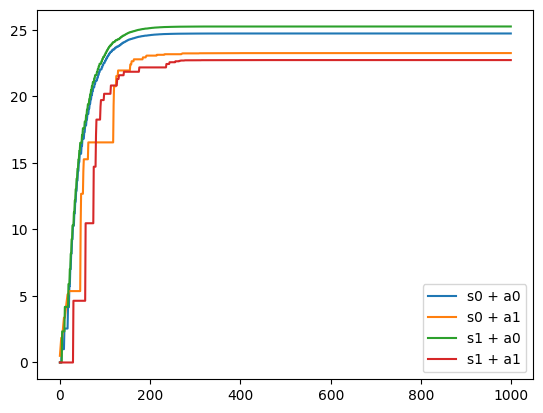

In [120]:
actions = ['move', 'stay']
reward_table = np.array([[2, 1],
                         [3, 0]])
q_table = np.zeros([2,2])
alpha = 0.5
gamma = 0.9
epsil = 0.3
episodes = 1000
s_init = 0
counter = 0
table_data = np.array([])

# print(f'initial state: {s_init}')
for i in range(episodes):
    if counter == 0: s_now = s_init

    if np.random.random() > epsil:
        # print('I will exploit')
        if np.all(q_table[s_now] == q_table[s_now][0]):
            action_index = np.random.randint(0, len(q_table[s_now]))
        else:
            action_index = q_table[s_now].argmax()
    else:
        # print('I will explore')
        action_index = np.random.randint(0, len(q_table[s_now]))
    action = actions[action_index]

    if action == 'move':
        s_new = (s_now + 1)%2
    if action == 'stay':
        s_new = s_now

    reward = reward_table[s_now][action_index]
    q = q_table[s_now][action_index] + alpha * (reward + gamma*np.max(q_table[s_new]) - q_table[s_now][action_index])
    q_table[s_now][action_index] = q 

    counter+=1
    s_now = s_new
    table_data = np.append(table_data, q_table)
    # print(f'action: {action}')
    # print(q_table)
    # print(f'next state: {s_new}')
    # print('====================')

print(f'final table:\n {q_table}')

data = table_data.reshape(-1, 4).T
for i, d in enumerate(data):
    plt.plot(d, label=f's{int(i/2)} + a{int(i%2)}')
plt.legend()
plt.show()

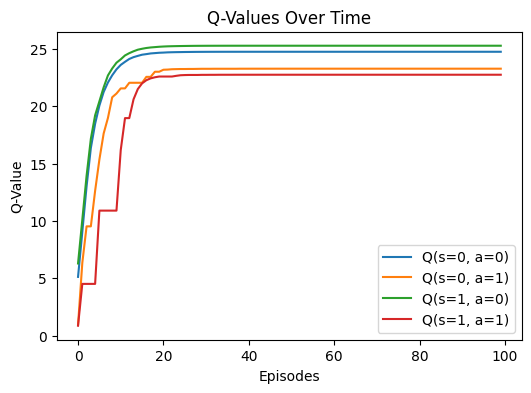

[[24.73684211 23.26315789]
 [25.26315789 22.73684211]]


In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
states = [0, 1]
actions = [0, 1]
Q = np.zeros((len(states), len(actions)))  # Q-table: 2 states x 2 actions
rewards = {
    (0, 0): (1, 2),  # (next_state, reward) for (state=0, action=0)
    (0, 1): (0, 1),  # (next_state, reward) for (state=0, action=1)
    (1, 0): (0, 3),  # (next_state, reward) for (state=1, action=0)
    (1, 1): (1, 0),  # (next_state, reward) for (state=1, action=1)
}

# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.3  # Exploration rate
episodes = 100  # Number of episodes

# Tracking Q-values over episodes
q_values_history = {key: [] for key in [(s, a) for s in states for a in actions]}

# Q-learning loop
for episode in range(episodes):
    state = np.random.choice(states)  # Start in a random state
    
    for step in range(10):  # Limit steps per episode to avoid infinite loops
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(actions)  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        # Environment transition
        next_state, reward = rewards[(state, action)]

        # Q-value update
        Q[state, action] += alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        # Update state
        state = next_state

    # Save Q-values after this episode
    for (s, a) in q_values_history:
        q_values_history[(s, a)].append(Q[s, a])

# Plotting Q-values
plt.figure(figsize=(6, 4))
for (s, a), q_values in q_values_history.items():
    plt.plot(range(episodes), q_values, label=f"Q(s={s}, a={a})")
plt.xlabel("Episodes")
plt.ylabel("Q-Value")
plt.title("Q-Values Over Time")
plt.legend()
plt.show()
print(Q)

In [108]:
q_table - Q

array([[4.98801001e-12, 1.82467375e-11],
       [6.06803496e-12, 4.32009983e-12]])